<a href="https://colab.research.google.com/github/quanticedu/MSBA/blob/main/Clustering%20and%20Association%20Rules/Analytics%20Lab/clustering_and_association_rules_analytics_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytics Lab: Customer Segmentation for Akanni's Chin Chin Business**


##Scenario

Akanni's chin chin business has quickly become a viral sensation across Nigeria. 🧑🏾‍🍳

Recognizing the potential for growth, Akanni has expanded her business model into a cloud kitchen empire. With the rapid expansion and increased customer data, Akanni faces the challenge of understanding and segmenting her diverse clientele in order to personalize marketing strategies, optimize menu offerings, and enhance customer satisfaction.

Akanni turns to K-means clustering to identify customer segments by analyzing large volumes of customer data, including purchase history, preferences, frequency of orders, and geographic location.

**Your task: Employ K-means clustering to find distinct customer segments within the provided dataset of Akanni's customer data.**


##Discussion Questions

Discuss with your team members:

1.  What can be possible ways in which the implementation of K-means clustering enable Akanni to streamline her operations?

2.  How can it also help make strategic data-driven decisions?

3. What can be their next steps in implementing advanced analytics, data science, AI/ML?

##Technical Challenges:

1. **Data Exploration and Preprocessing:** Explore the dataset to understand the distribution of variables. Perform any necessary data preprocessing steps (e.g., scaling).

2. **Choosing the Number of Clusters:** Use the Elbow Method to determine the optimal number of clusters for segmentation.

3. **Model Building:** Apply K-means clustering to segment the customers.
Analyze the characteristics of each cluster.

4. **Visualization:** Visualize the clusters in a 2D or 3D plot.
Interpret the clusters in the context of customer segmentation.

Below, we'll show possible solutions for these technical challenges.

##Solution for Challenge 1: Data Exploration and Preprocessing

Explore the dataset to understand the distribution of variables. Perform any necessary data preprocessing steps (e.g., scaling).

In [ ]:
# Challenge-1 Solution

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv('customer_data.csv')
df.head()

# Data Exploration and Preprocessing
df.describe()


FileNotFoundError: [Errno 2] No such file or directory: 'chin_chin_customer_data.csv'

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

 In K-means clustering, the distance between data points is crucial. Features with larger scales can dominate the distance calculations, leading to biased clustering results. Therefore in the step above, we stardardized the data. Standardizing ensures that all features contribute equally to the clustering process, improving the performance and accuracy of the K-means algorithm.

##Solution for Challenge 2: Choosing the Number of Clusters

 Use the Elbow Method to determine the optimal number of clusters for segmentation.

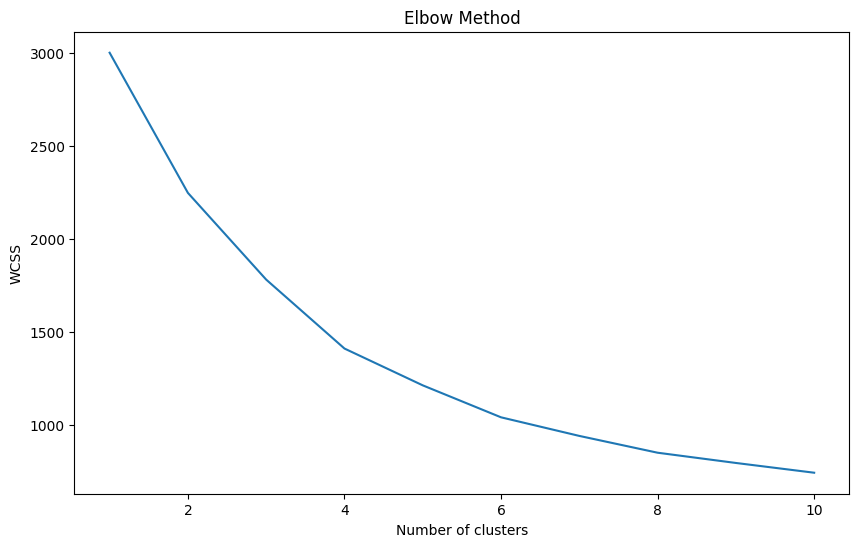

In [ ]:
# Choosing the Number of Clusters
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The Elbow Method helps determine the optimal number of clusters in K-means clustering by plotting the within-cluster sum of squares (WCSS) against the number of clusters (k). The optimal number is at the "elbow point" of the plot, where the rate of decrease in WCSS sharply changes, indicating a balance between minimizing WCSS and avoiding overfitting. In this case, the elbow is observed at 4 clusters, suggesting that 4 is the optimal number, as adding more clusters beyond this point yields diminishing returns in reducing WCSS.

##Solution for Challenge 3: Model Building

Apply K-means clustering to segment the customers.
Analyze the characteristics of each cluster.

In [ ]:
## Challenge-3 Solution

# Model Building
# Apply KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)

# Visualization
# Visualizing the clusters in 2D
# Visualization in 2D using 'Annual Income' and 'Spending Score'
plt.figure(figsize=(10, 8))
plt.scatter(df_scaled[y_kmeans == 0, 1], df_scaled[y_kmeans == 0, 2], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[y_kmeans == 1, 1], df_scaled[y_kmeans == 1, 2], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[y_kmeans == 2, 1], df_scaled[y_kmeans == 2, 2], s=100, c='green', label='Cluster 3')
plt.scatter(df_scaled[y_kmeans == 3, 1], df_scaled[y_kmeans == 3, 2], s=100, c='cyan', label='Cluster 4')

# Plotting centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

NameError: name 'KMeans' is not defined

Cluster Descriptions

Cluster 1: Low to medium income, high spending - frequent spenders, value-conscious.

Cluster 2: Medium to high income, moderate spending - balanced spenders, value quality.

Cluster 3: Medium income, low spending - conservative spenders, budget-conscious.

Cluster 4: High income, high spending - affluent spenders, luxury-focused.

##Solution for Challenge 4: Visualization

Visualize the clusters in a 2D or 3D plot.
Interpret the clusters in the context of customer segmentation.

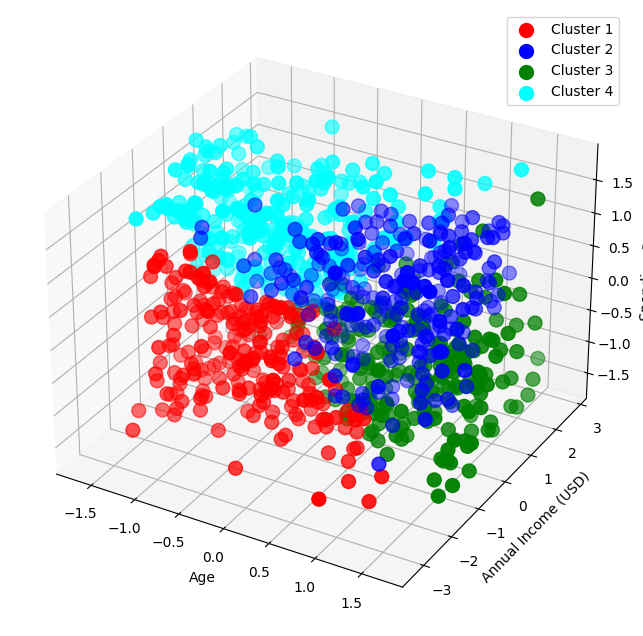

In [ ]:
#Challenge-4 Solution

# Visualization
# Visualizing the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scaled[y_kmeans == 0, 0], df_scaled[y_kmeans == 0, 1], df_scaled[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(df_scaled[y_kmeans == 1, 0], df_scaled[y_kmeans == 1, 1], df_scaled[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(df_scaled[y_kmeans == 2, 0], df_scaled[y_kmeans == 2, 1], df_scaled[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(df_scaled[y_kmeans == 3, 0], df_scaled[y_kmeans == 3, 1], df_scaled[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (USD)')
ax.set_zlabel('Spending Score')
ax.legend()
plt.show()

The 3D plot visually confirms that the clusters are well-separated, indicating that the K-means algorithm has effectively segmented the customers into distinct groups.

* Cluster 1: Young, lower income, high spending.

* Cluster 2: Middle-aged, medium to high income, moderate spending.

* Cluster 3: Older, medium income, low spending.

* Cluster 4: Young to middle-aged, high income, high spending.